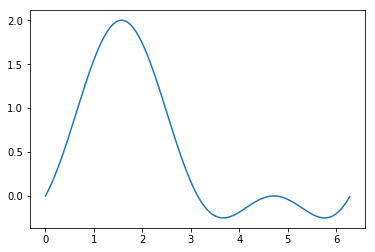

In [113]:
## DEveloped by Isheeta Jha and Prabhash Kumar Jha ##

import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
X=np.linspace(0.0, 2*np.pi, num=1256, endpoint=False)
Y=np.sin(X)+pow(np.sin(X),2)

plt.plot(X,Y)
plt.show()
def kernel_exponential(x, y):
    sigma2=0;
    if(x==y):
        sigma2=0.001;
    return (0.5*np.exp(-(np.square(x - y))/0.3)+sigma2)

H:\Anaconda_installed_here\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in sqrt


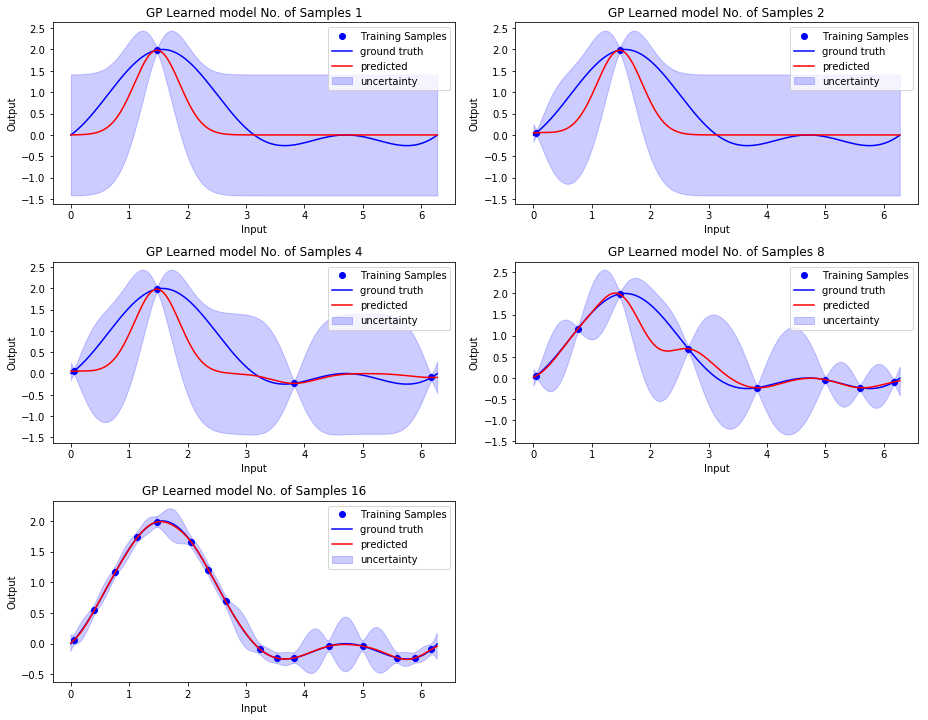

In [121]:
train_points=[];
target_points=[]
f = plt.figure(figsize=(13,13))
k=1;
  
for i in range(16):#16 iterations
    
    if(i==1):
        train_index=np.random.randint(1,len(X));
        #train_index=400;
    else:
        train_index=np.argmax(test_var);
    #choose a point
  
    
    train_points=np.append(train_points,X[train_index])     #keep on increasing the size of array
    K = [[kernel_exponential(x,y) for x in train_points] for y in train_points]
    K = np.asarray(K);
    inv_K=inv(K);
    target_points=np.append(target_points,Y[train_index])
    test_mean=np.copy(X)
    test_var=np.copy(X)
    for j in range(len(X)):#for each sample in data

        K_star=[kernel_exponential(x,X[j]) for x in train_points]
        K_star = np.asarray(K_star)
        b = np.array(K_star)[np.newaxis]
        K_star=b

        pd=K_star.dot(inv_K).dot(target_points)
        test_mean[j]=np.sum(pd)

        K_star_star=kernel_exponential(X[j],X[j])
        var=K_star_star - K_star.dot(inv_K).dot(K_star.T)
        test_var[j]=np.sum(var)


    if(i==0 or bool(i+1 and not ((i+1)&i))):
        order = np.argsort(train_points)
        xs = np.array(train_points)[order]
        ys = np.array(target_points)[order]
        ax = f.add_subplot(4,2,k)

        ax.plot(xs,ys,'bo',label="Training Samples")
        ax.plot(X, Y, c="b",label='ground truth')
        ax.plot(X, test_mean, c="r",label='predicted')
        ax.fill_between(X, test_mean - np.sqrt(test_var)*2 ,  test_mean + np.sqrt(test_var)*2 ,color='blue', alpha=0.2,label='uncertainty')
        ax.legend()
        plt.tight_layout()
        plt.title('GP Learned model No. of Samples %i' %(i+1))
        plt.ylabel('Output')
        plt.xlabel('Input')
        k=k+1
        
plt.show()
 
  
   

